<a href="https://colab.research.google.com/github/mmgyorke/image-augmentation-techniques-simple/blob/main/single_image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import PIL
import PIL.Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
#from tensorflow.keras import mixed_precision

SEEDS = 42

np.random.seed(SEEDS)
tf.random.set_seed(SEEDS)
import os

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io

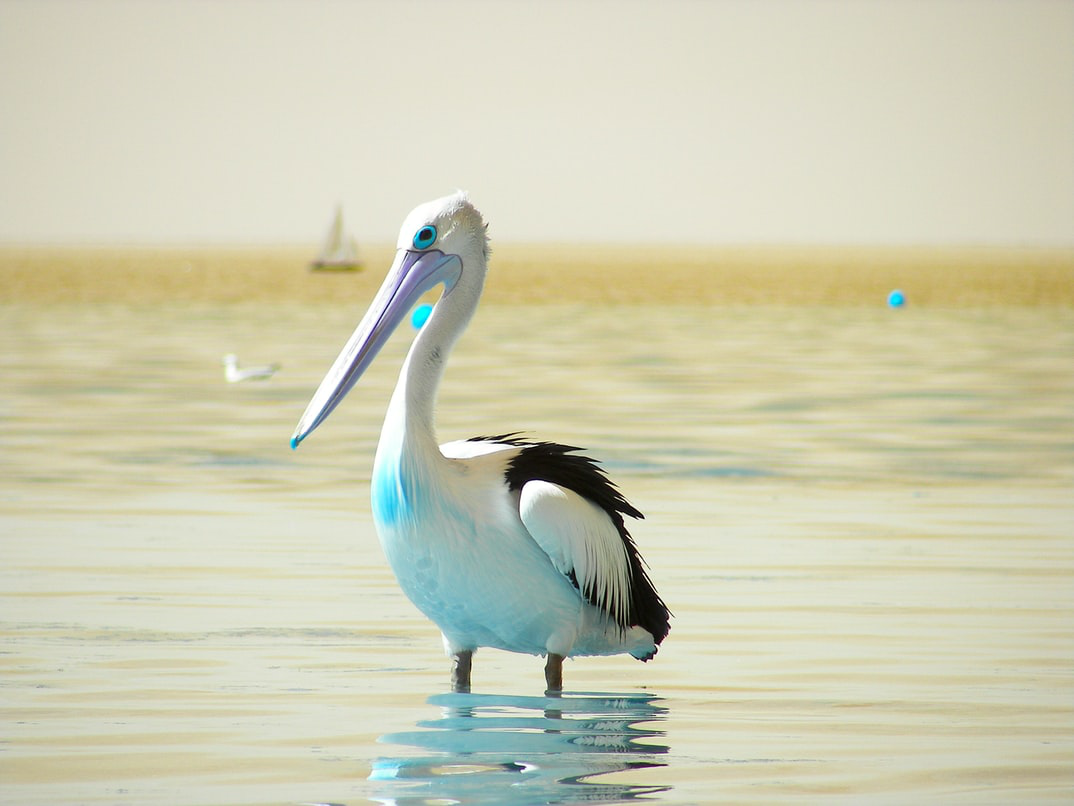

In [ ]:
img_path = "/pelican_beach.jpeg"
image = io.imread(img_path)
cv2_imshow(image)

In [ ]:
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
806
1074
3


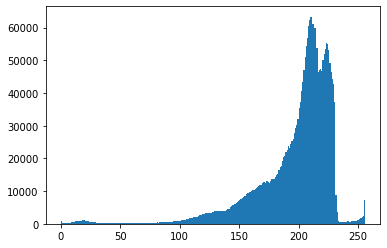

In [ ]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

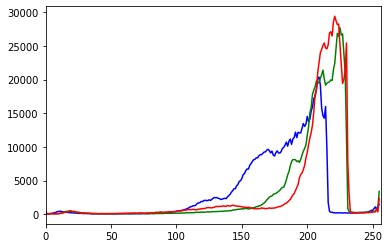

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

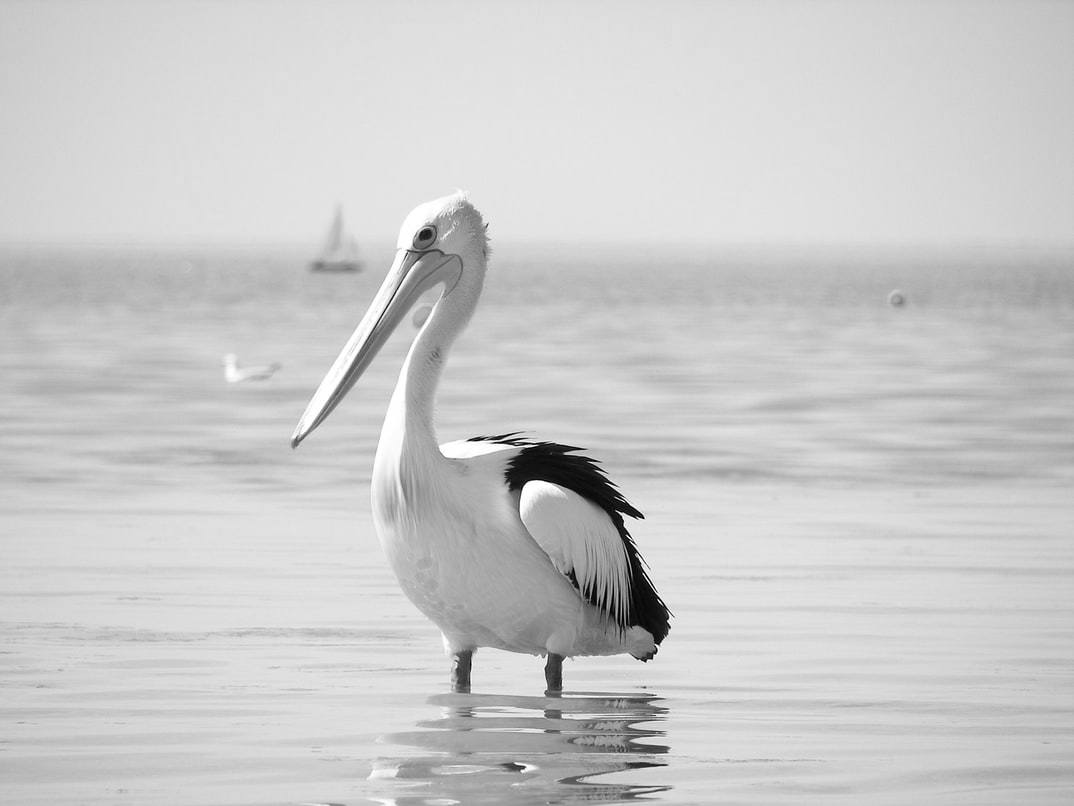

In [ ]:
grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(grayscale_image)

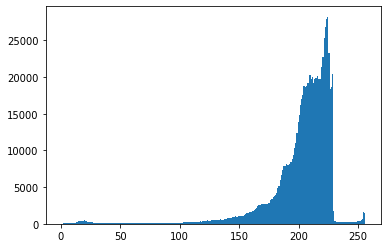

In [ ]:
plt.hist(grayscale_image.ravel(),bins = 256, range = [0, 256])
plt.show()

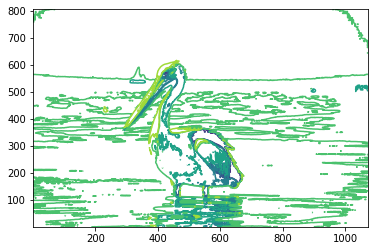

In [ ]:
plt.contour(grayscale_image, origin = "image")

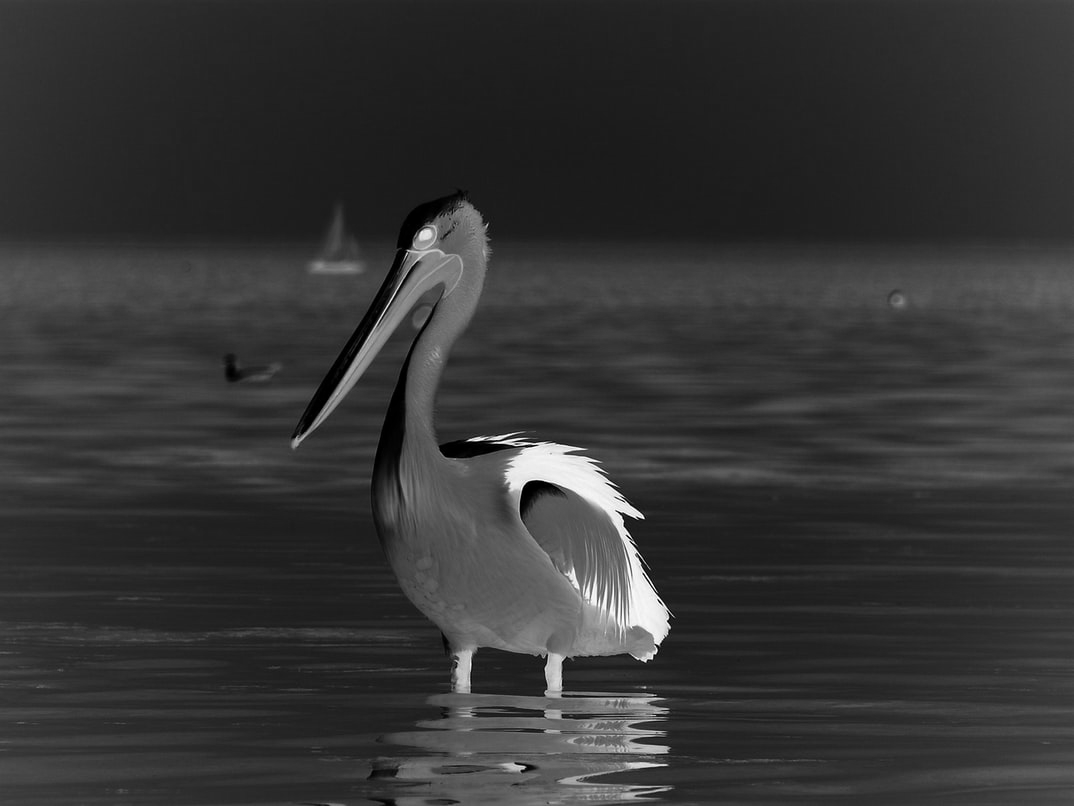

In [ ]:
im2 = 255 - grayscale_image
cv2_imshow(im2)

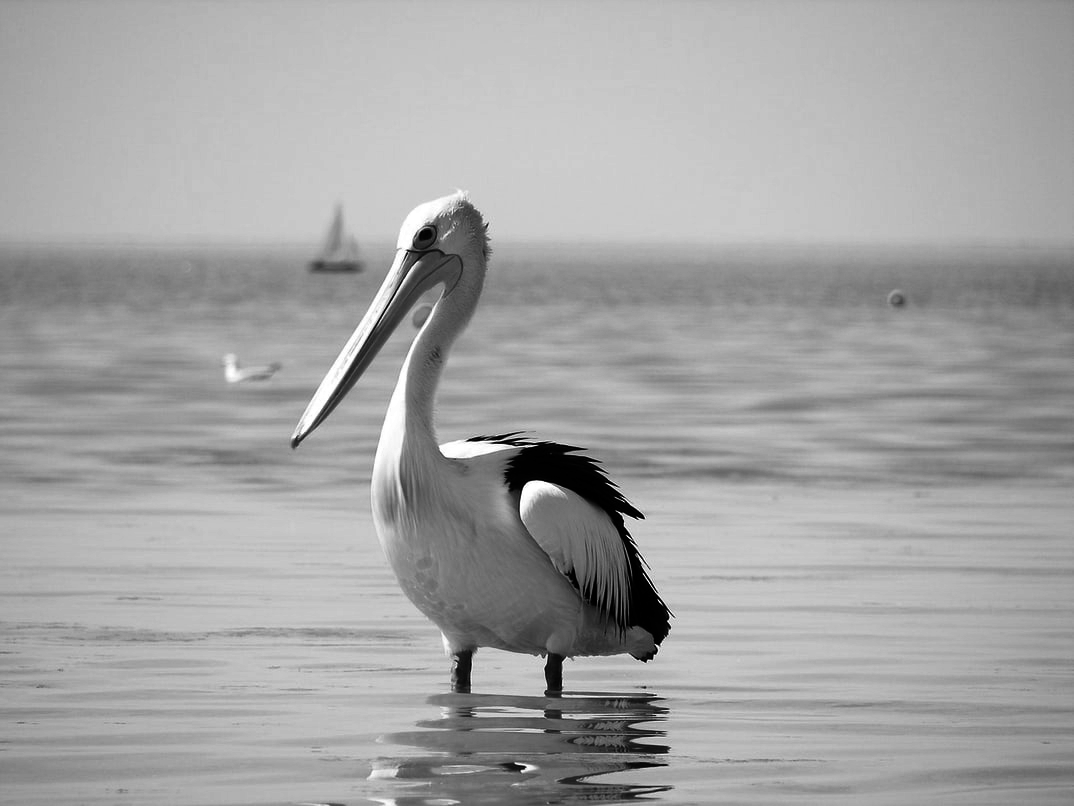

In [ ]:
im3 = 255.0*(grayscale_image/255.0)**2
cv2_imshow(im3)

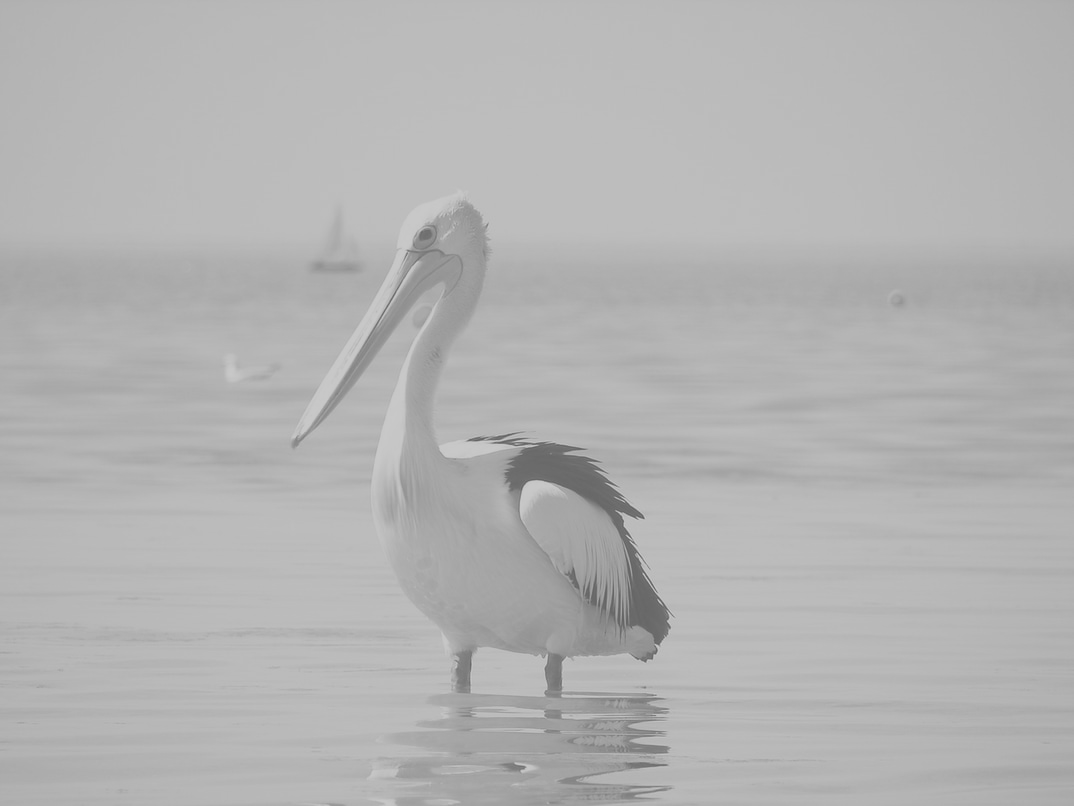

In [ ]:
im4 = (100.0/255)*grayscale_image + 100
cv2_imshow(im4)

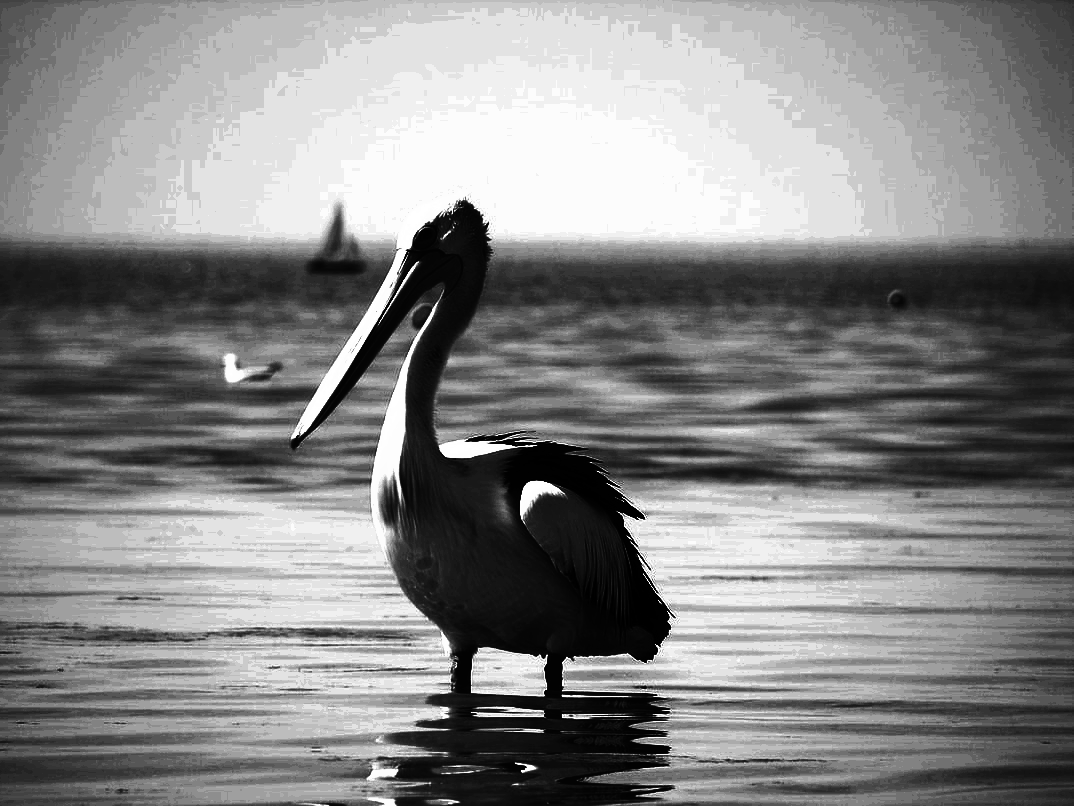

In [ ]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)

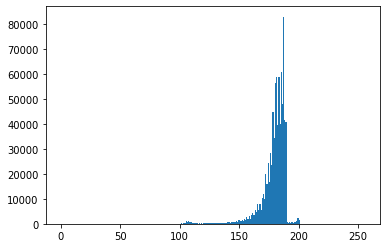

In [ ]:
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

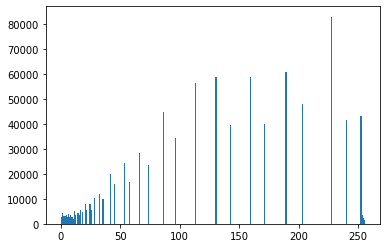

In [ ]:
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

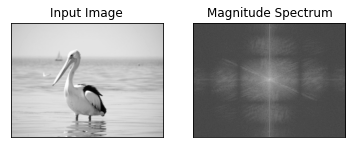

In [ ]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(grayscale_image,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

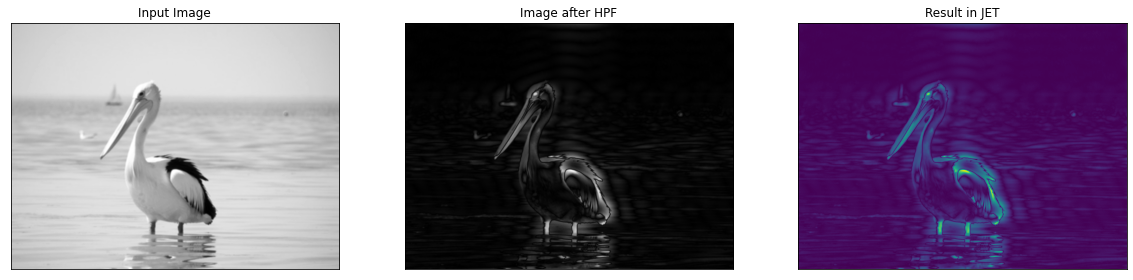

In [ ]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
img = load_img('golden_retriever.jpg')
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=360)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

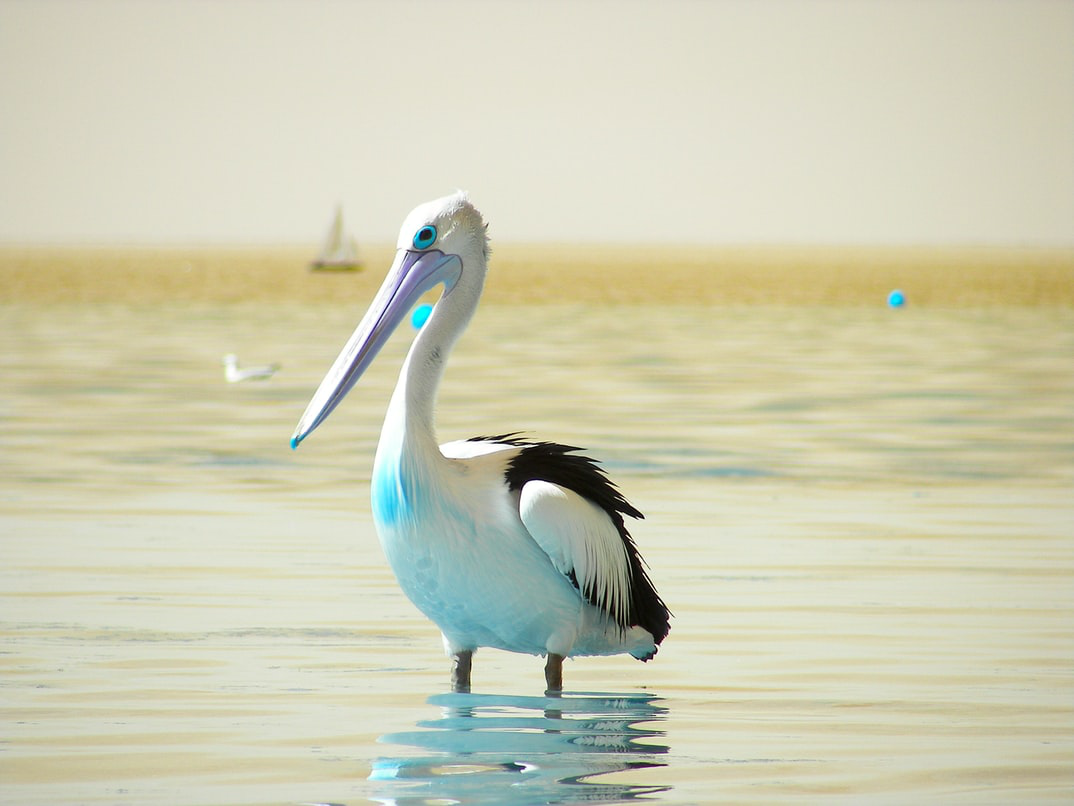

In [ ]:
cv2_imshow(image)

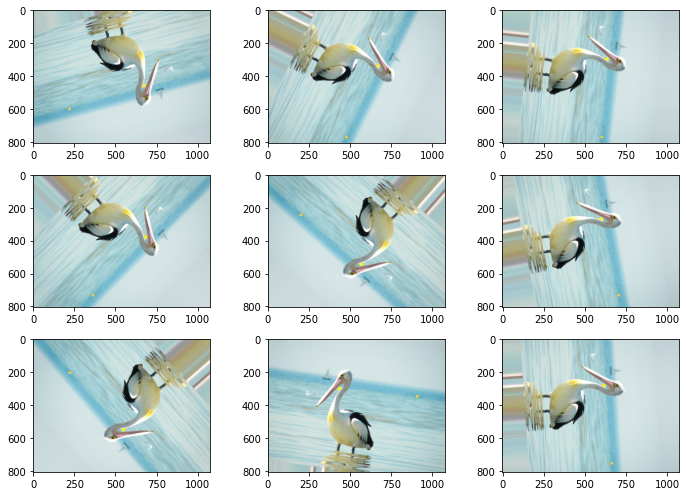

In [ ]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
img = load_img('/pelican_beach.jpeg')
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=360)
it = datagen.flow(samples, batch_size=1)

plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

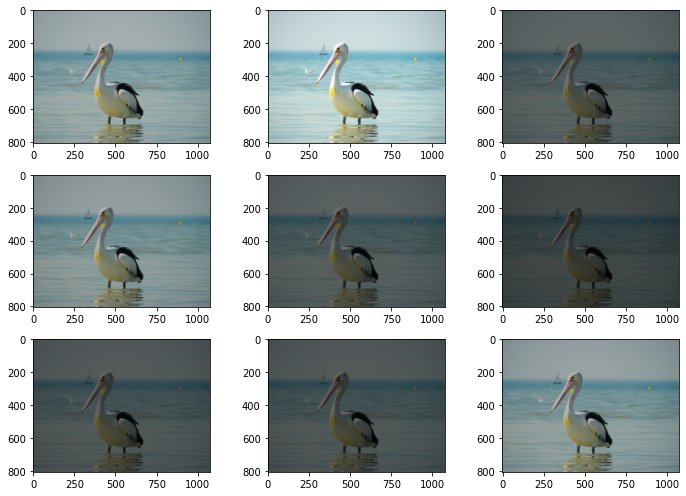

In [ ]:
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

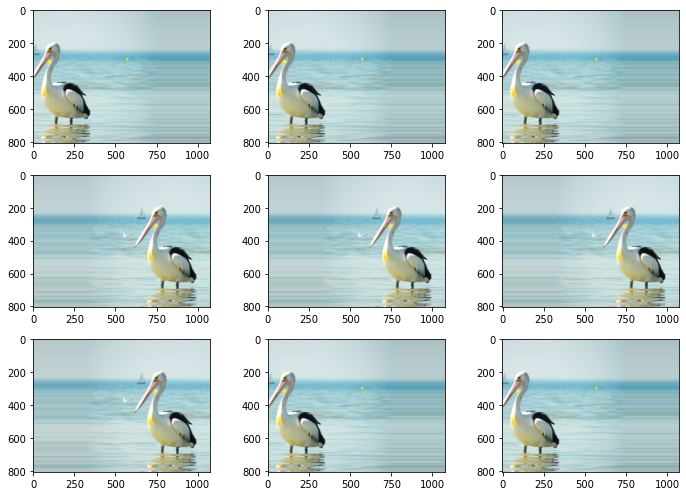

In [ ]:
datagen = ImageDataGenerator(width_shift_range=[-0.3,0.3])
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	plt.subplot(330 + 1 + i)
	# generate batch of images using iterator
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

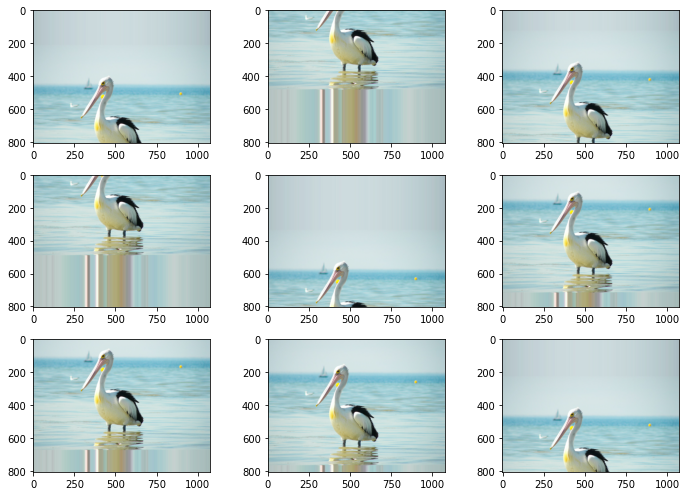

In [ ]:
datagen = ImageDataGenerator(height_shift_range=0.5)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

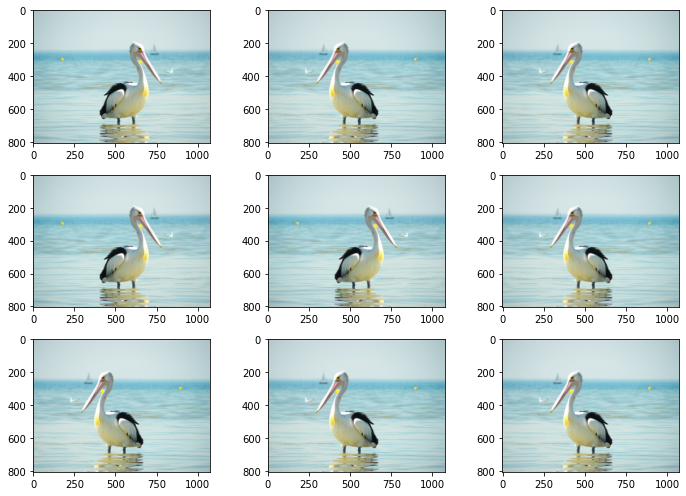

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

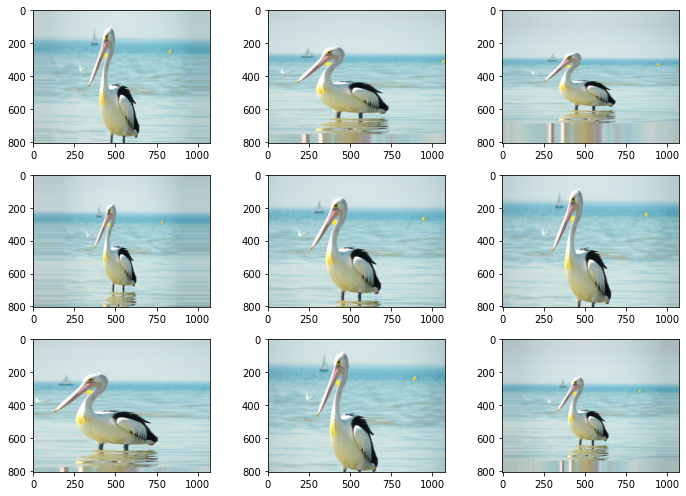

In [ ]:
datagen = ImageDataGenerator(zoom_range=[0.5,1.5])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()